# Obsolete code

# From 2:

## Full PCA with 50 components
Running PCHA on the full PCA (50 components)-- the variance explained here is the proportion of the variance in the full 50 components.

0
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 5 archetypes, distance between k* and line:  0.11


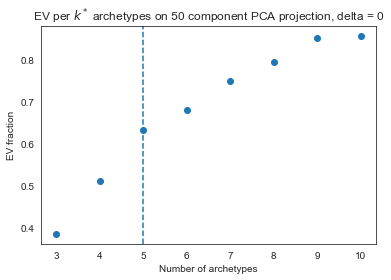

0.1
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 7 archetypes, distance between k* and line:  0.12


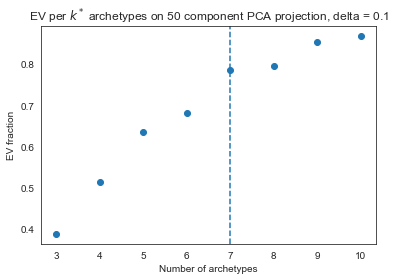

0.2
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 5 archetypes, distance between k* and line:  0.07
k_max = 9
K* = 5 archetypes, distance between k* and line:  0.09
k_max = 10
K* = 7 archetypes, distance between k* and line:  0.12


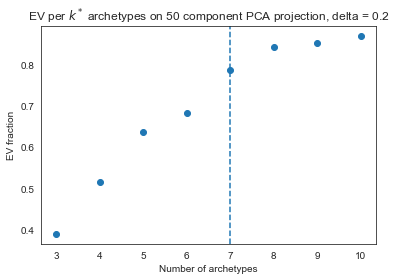

0.5
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.12
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.14


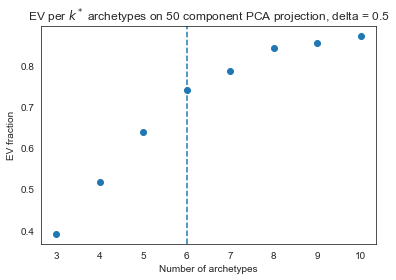

1
Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.08
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.12
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.14


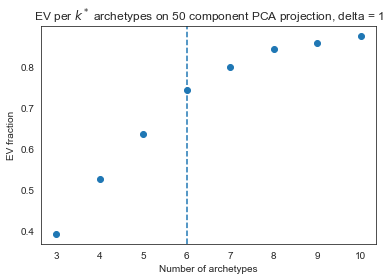

In [18]:
def ev_per_arc_by_delta_50comp(delta):
    ev_per_arc = []
    for i in range(3,11):
        XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=i, delta=delta)
        ev_per_arc.append(varexpl)
        # print(varexpl)
    plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)
    plt.title(f"EV per $k^*$ archetypes on 50 component PCA projection, delta = {delta}")
    plt.xlabel("Number of archetypes")
    plt.ylabel("EV fraction")
    print("Knee in EV vs k plot for different k_max:")
    for kmax in range(8,11):
        print('k_max =', kmax)
        knee, farthestk = find_knee(ev_per_arc, kmax=kmax)
    plt.axvline(x=knee, linestyle = "--")
    plt.savefig(f'../../figures/EV_per_k_50comp_clines_delta_{delta}.pdf')
    plt.show()
for delta in [0,0.1,0.2,0.5,1]:
    print(delta)
    ev_per_arc_by_delta_50comp(delta)

### Three archetypes

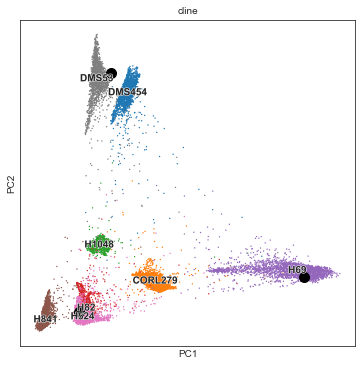

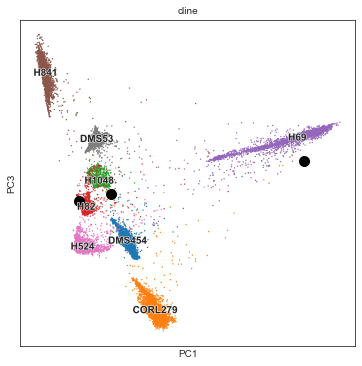

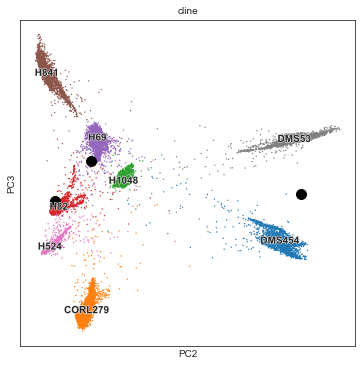

In [23]:
XC_3_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=3, delta=0.1)
XC_3_50comp = np.array(XC_3_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_3_50comp[int(comp[0])-1], XC_3_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Five archetypes

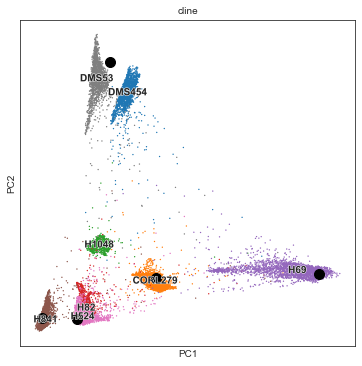

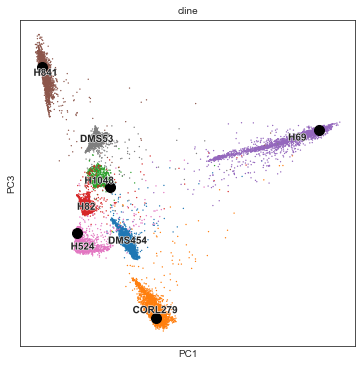

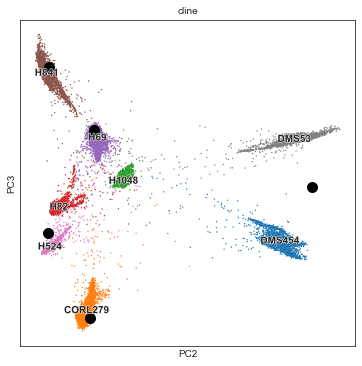

In [19]:
XC_5_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=5, delta=0.1)
XC_5_50comp = np.array(XC_5_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_5_50comp[int(comp[0])-1], XC_5_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Six archetypes

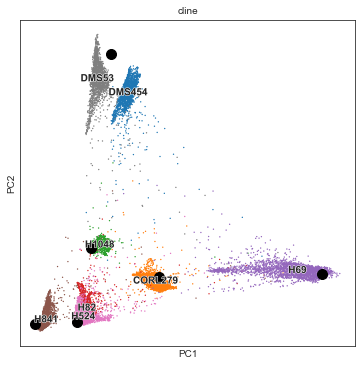

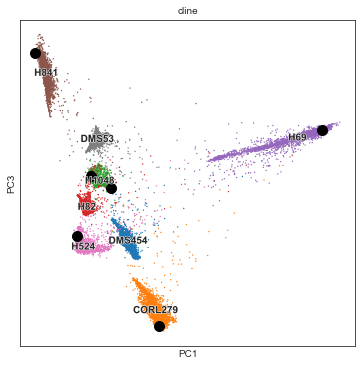

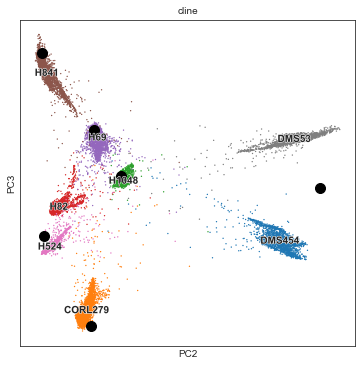

In [20]:
XC_6_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=6, delta=0.1)
XC_6_50comp = np.array(XC_6_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_6_50comp[int(comp[0])-1], XC_6_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

### Seven archetypes

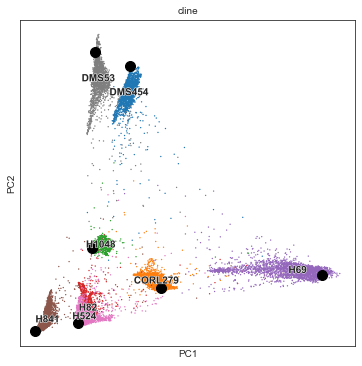

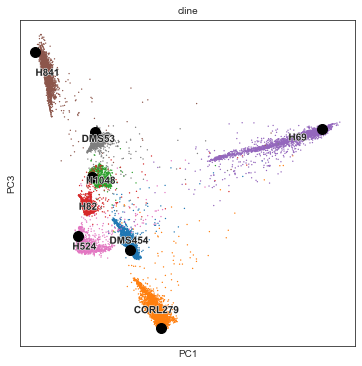

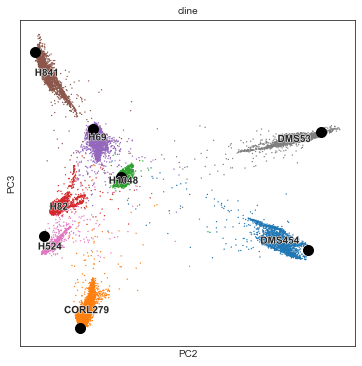

In [21]:
XC_7_50comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'].T, noc=7, delta=0.1)
XC_7_50comp = np.array(XC_7_50comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (6,6), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_7_50comp[int(comp[0])-1], XC_7_50comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

**Conclusions**
When we run a PCA on the magic imputed dataset, over 80% of the variance in explained by just the first 8 components (most likely due to the fact that we have 8 samples). PCHA in the full PCA space (50 components) shows that 5 or 7 archetypes best describe the data. With five archetypes, we get archetypes near H841 (Y), H524 (N), DMS454/53 (A2), H69 (A), and CORL279 (A/N). H1048 and H82 are closer to the middle. We can use the method described in the MAGIC paper to assign archetypal neighborhoods.
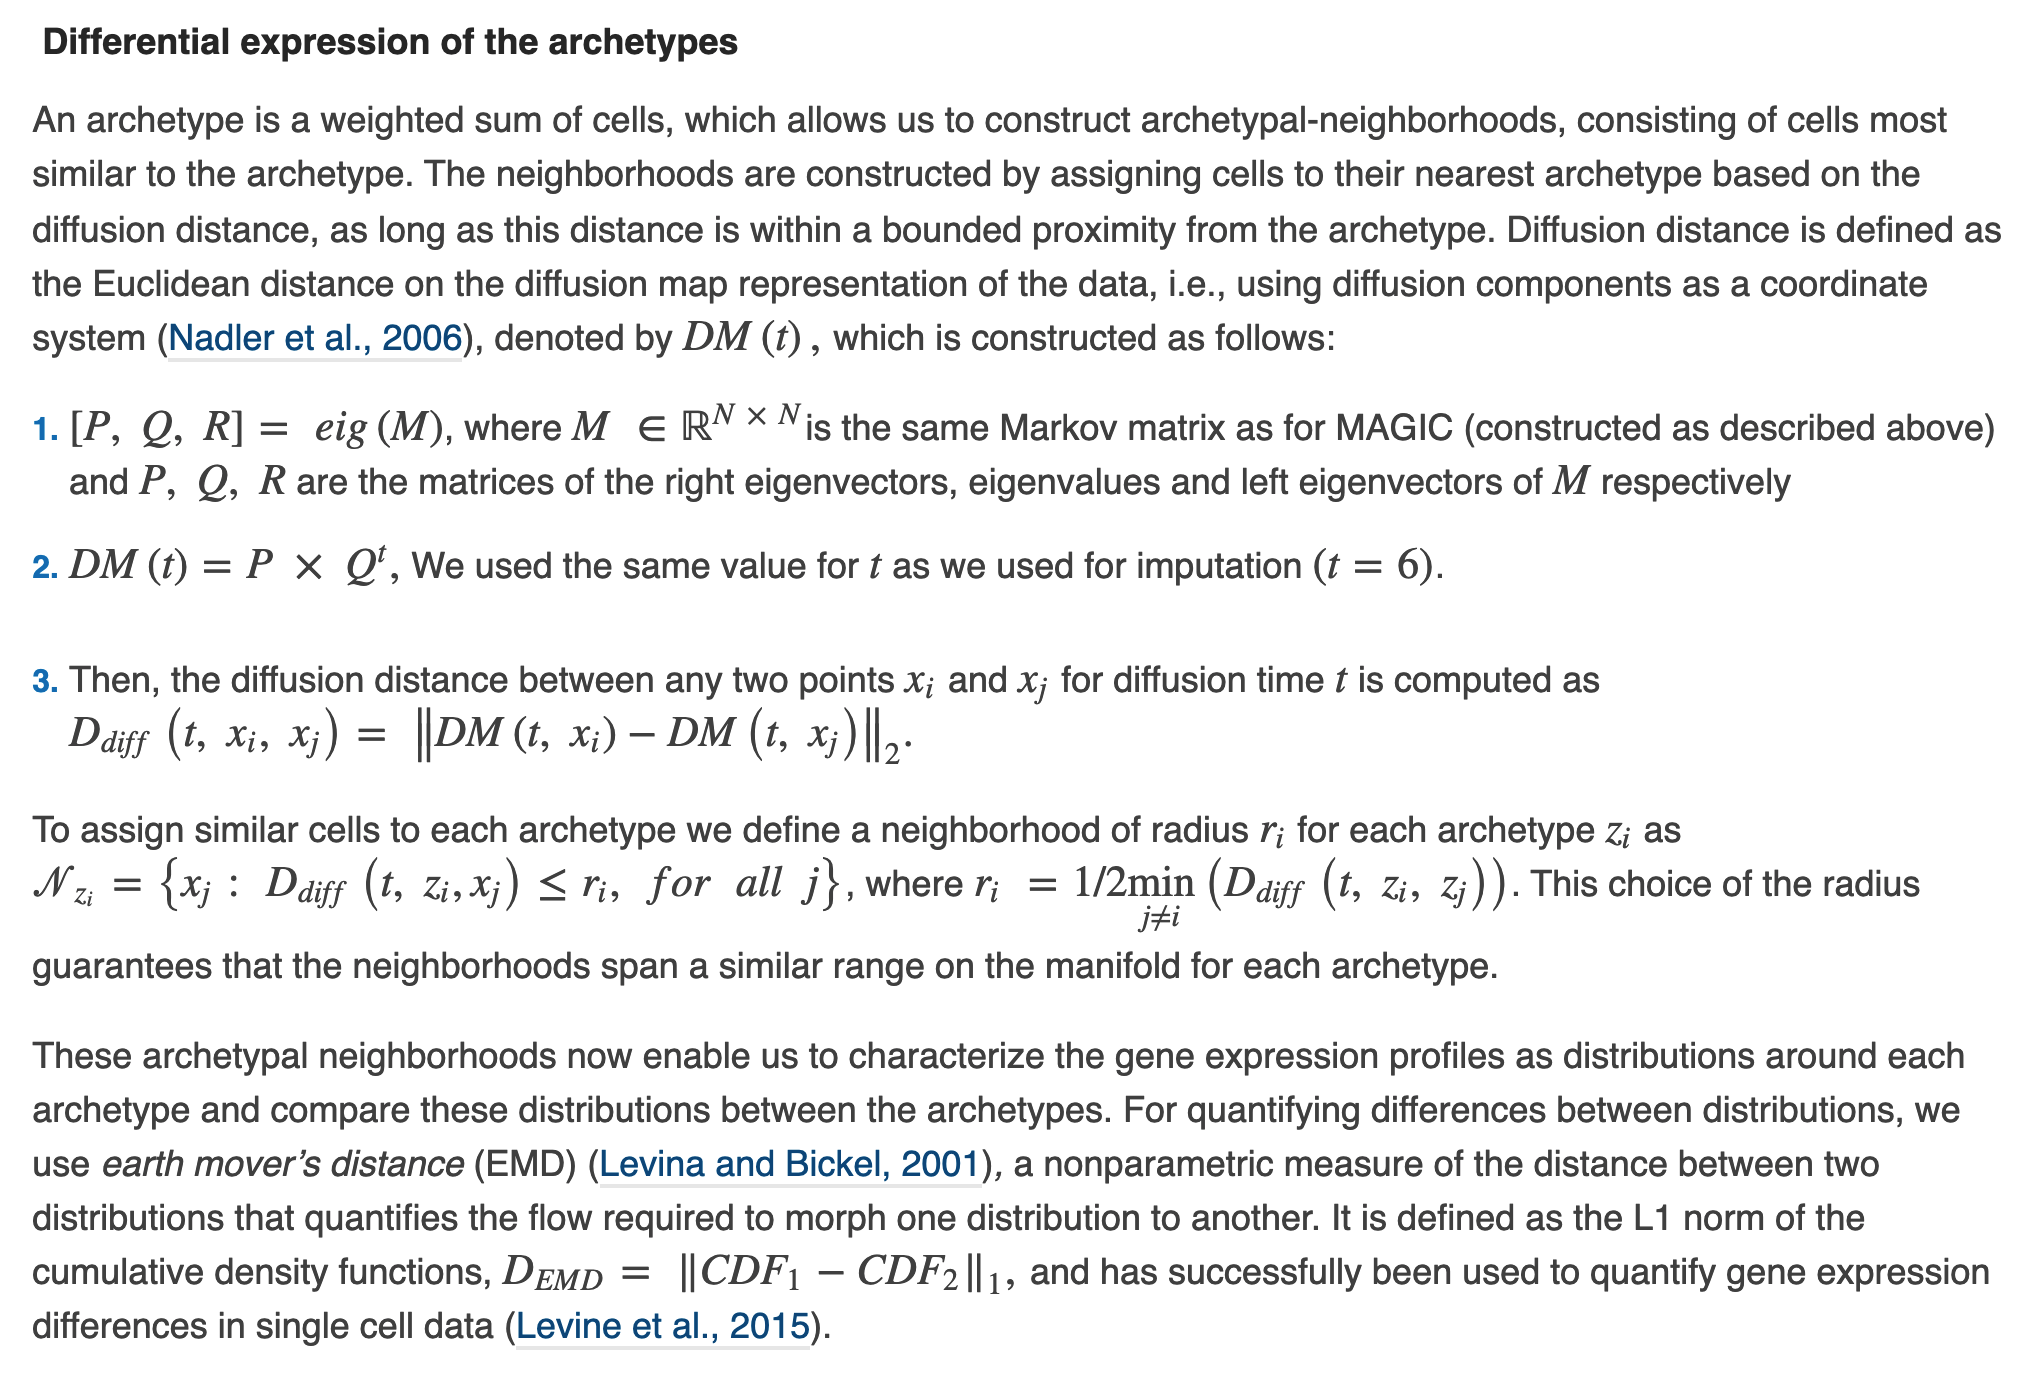

## Top 8 components of PCA
The top 8 components explain over 81% of the imputed data (and form the elbow of the EV vs PC curve), so we can double check that we get the same results when subsetting to these components. This shouldn't make much difference, but it will make a difference in the distances of cells to archetypes, since volume increases exponentially. The number of data points needed to robustly approximate the polytope also grows exponentially with the dimension.

Knee in EV vs k plot for different k_max:
k_max = 8
K* = 6 archetypes, distance between k* and line:  0.09
k_max = 9
K* = 6 archetypes, distance between k* and line:  0.14
k_max = 10
K* = 6 archetypes, distance between k* and line:  0.17


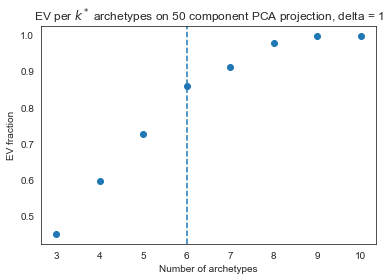

In [25]:
ev_per_arc = []
for i in range(3,11):
    XC, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=i, delta=0.1)
    ev_per_arc.append(varexpl)
    # print(varexpl)
plt.scatter(x = [3,4,5,6,7,8,9,10], y = ev_per_arc)
plt.title(f"EV per $k^*$ archetypes on 50 component PCA projection, delta = 0.1")
plt.xlabel("Number of archetypes")
plt.ylabel("EV fraction")
print("Knee in EV vs k plot for different k_max:")
for kmax in range(8,11):
    print('k_max =', kmax)
    knee, farthestk = find_knee(ev_per_arc, kmax=kmax)
plt.axvline(x=knee, linestyle = "--")
plt.savefig(f'../../figures/EV_per_k_8comp_clines_delta_0.1.pdf')
plt.show()

**It looks like 6 archetypes still fit the data well.** We'll calculate the archetype locations in the top 8 dimensions, and then use the PC coefficient matrix to estimate the archetypes on the original phenotypic space.

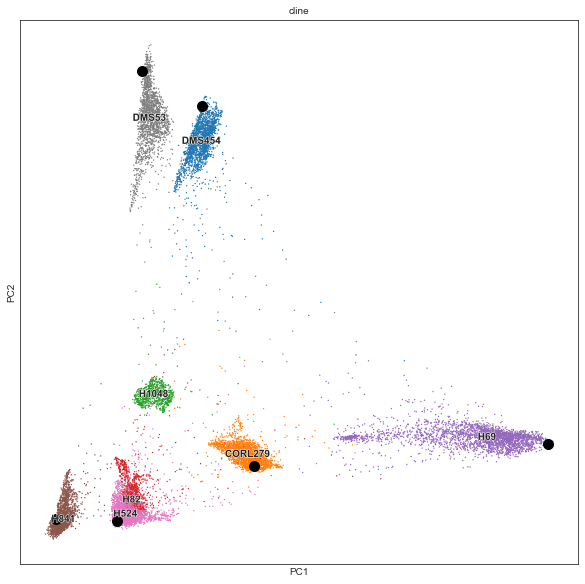

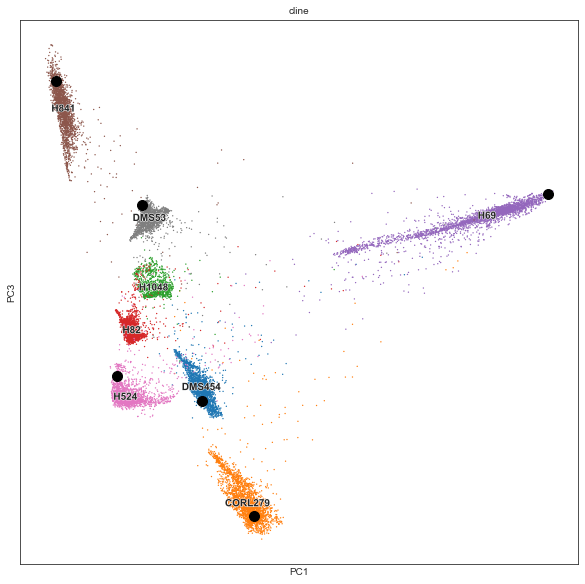

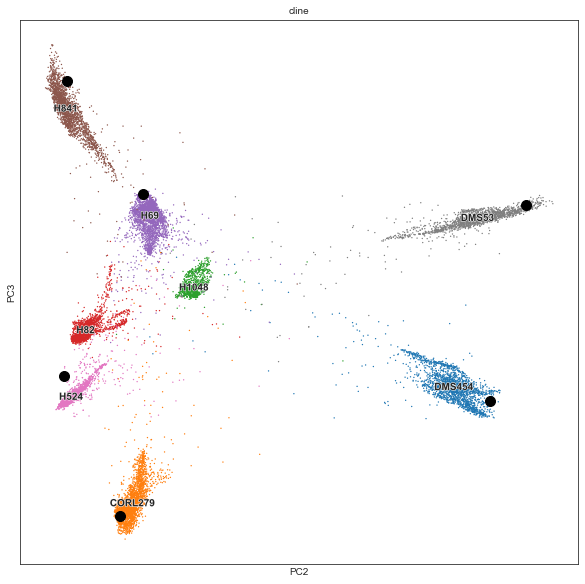

In [15]:
XC_6_8comp, S, C, SSE, varexpl = PCHA(X_magic.obsm['X_pca'][:,0:8].T, noc=6, delta=0.1)
XC_6_8comp = np.array(XC_6_8comp)
for components in ['1,2','1,3','2,3']:
    scv.pl.pca(X_magic, color = 'cline', components=components, show=False, figsize= (10,10), frameon=True)
    comp = components.split(',')
    plt.scatter(XC_6_8comp[int(comp[0])-1], XC_6_8comp[int(comp[1])-1], color = 'k', s = 100)
    plt.xlabel("PC"+comp[0])
    plt.ylabel("PC"+comp[1])

    plt.show()

## Labeling cells based on diffusion distance to archetypes
From Van Dijk et al:
An archetype is a weighted sum of cells, which allows us to construct archetypal-neighborhoods, consisting of cells most similar to the archetype. The neighborhoods are constructed by assigning cells to their nearest archetype based on the diffusion distance, as long as this distance is within a bounded proximity from the archetype. Diffusion distance is defined as the Euclidean distance on the diffusion map representation of the data, i.e., using diffusion components as a coordinate system (Nadler et al., 2006), denoted by DM(t).

In [289]:
XC_df = pd.DataFrame(XC_5_50comp)
XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


In [290]:
X_magic_pca_df = pd.DataFrame(X_magic.obsm['X_pca'], index = X_magic.obs_names)
X_magic_full_df = X_magic_pca_df.append(XC_df.T)
X_magic_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454,-0.533001,15.783157,-4.999127,4.431529,12.344715,-0.994273,-1.582305,-0.146019,-2.353136,-0.403415,...,0.093539,-0.044980,-0.184641,0.154725,0.229788,-0.019431,-0.279231,-0.593771,-0.075851,-0.083872
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454,-1.523991,13.803243,-5.344131,5.951599,12.662260,0.173870,0.809394,4.074553,2.872071,-2.464070,...,-0.042050,-0.104556,-0.057729,-0.049952,0.222943,-0.012697,-0.111233,-0.060783,0.063759,-0.083973
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454,-0.907271,16.635292,-5.618718,4.974217,13.788206,-1.106682,-1.578936,0.021298,-1.360840,0.362825,...,0.040892,-0.090968,0.053040,0.018579,0.115013,-0.023503,-0.094937,-0.160806,0.062553,-0.120318
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454,-0.573030,15.642927,-5.679330,5.476871,13.618507,-0.932564,-1.982671,-2.147378,0.010732,-1.053164,...,0.010547,-0.176261,-0.163170,0.032600,0.065155,-0.001316,-0.088550,-0.098884,0.027512,0.091969
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454,-0.149213,14.805091,-4.791946,4.477124,12.224570,-0.283122,-0.215432,-1.115614,3.613449,3.655601,...,0.199946,-0.246780,-0.148420,-0.108300,-0.307141,0.144003,-0.073842,0.219010,-0.243986,-0.236940


In [318]:
pdx = squareform(pdist(X_magic_full_df, metric='euclidean')) # compute distances on pca
pdx_df = pd.DataFrame(pdx, index=X_magic_full_df.index, columns=X_magic_full_df.index)
pdx_df = pdx_df.loc[XC_df.columns].drop(XC_df.columns, axis = 1)
X_magic.obsm['arc_distance'] = pdx_df.T

Now that we have a euclidean distance to each archetype on the MAGIC imputed data, we can find a neighborhood with arbritrary radius to classify cells closest to each archetype as specialists. In Van Dijk et al., they choose a radius (distance on diffusion map) that is 1/2 the minimum of the distance between archetypes.

In [285]:
pdx_archetypes = squareform(pdist(XC_df.T, metric='euclidean')) # compute distances on pca

radius = .5*pdx_archetypes[pdx_archetypes > 0].min()

In [299]:
X_magic.obsm['arc_distance']['Arc_1']

2637-SM-1-GCCAAT_S1:AAAACCTCCCACTCCTCx-DMS454    35.336282
2637-SM-1-GCCAAT_S1:AAAACCTCCACGAAACGx-DMS454    34.107496
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454    36.472817
2637-SM-1-GCCAAT_S1:AAAACCTCCTTTACCCTx-DMS454    35.840855
2637-SM-1-GCCAAT_S1:AAAAGCCTACACAAGGCx-DMS454    34.946838
                                                   ...    
2639-SM-2-CTTGTA_S2:TTTGTGTCGGCCCTTAx-DMS53      35.113936
2639-SM-2-CTTGTA_S2:TTTGTGTCCACAAGGCx-DMS53      35.382322
2639-SM-2-CTTGTA_S2:TTTGTGTCCTGTTCTTx-DMS53      36.423780
2639-SM-2-CTTGTA_S2:TTTGTGTCCCCATCTGx-DMS53      33.513066
2639-SM-2-CTTGTA_S2:TTTGTGTCCAGTTTGCx-DMS53      37.469797
Name: Arc_1, Length: 16108, dtype: float64

In [322]:
tmp = X_magic.obsm['arc_distance'].copy()

In [328]:
# percent_radius = .1 # in percentage of datapoints; radius = .1 means 10% closest cells to each archetype

for arc in  X_magic.obsm['arc_distance'].columns:
    closest = X_magic.obsm['arc_distance'].loc[X_magic.obsm['arc_distance'][arc].sort_values() < radius]
    tmp.loc[closest.index,'specialist'] = arc


In [334]:
X_magic.obs['specialists_pca_diffdist'] = tmp.specialist

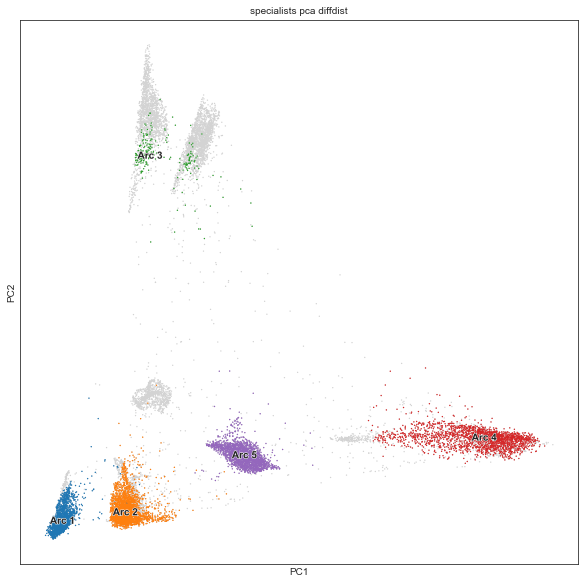

In [335]:
scv.pl.pca(X_magic, color = 'specialists_pca_diffdist', figsize= (10,10), frameon=True)


In [339]:
tmp.specialist = tmp.specialist.fillna('None')


In [341]:
pd.crosstab(tmp.specialist, X_magic.obs.cline)

cline,DMS454,CORL279,H1048,H82,H69,H841,H524,DMS53
specialist,,,,,,,,
Arc_1,0,0,0,0,0,1921,0,0
Arc_2,0,0,0,625,0,0,2257,0
Arc_3,63,0,0,0,0,0,0,158
Arc_4,0,0,0,0,2005,0,0,0
Arc_5,0,2336,0,0,0,0,0,0
None,1944,49,949,1086,794,142,88,1691


## !!! Labeling cells based on random walk to absorbing states
From Chan et al:
We solve this problem by using the probabilistic knn graph-based Phenograph classifier as implemented in the Phenograph package80 and has been shown to be highly successful in cases of mixed phenotypes which are frequently observed in cancer (Laughney et al., 2020). As input, we provide representative labeled cells for each known cell type. As output, each unlabeled cell is assigned a probability of belonging to each known cell type (termed Markov absorption probability). In cases where the probability for a given cell type is close to 1, we can annotate the cell with that cell type. In cases where the cell-type probability distribution is spread evenly across all cell types, we can consider these cells to represent a mixed phenotype. To implement this method, we first must have labeled training data available. To this end, we identify cells that can be confidently assigned to each subtype prior to calculating Markov absorption probabilities. Using reference RNA-sequencing of bulk tumors comparing SCLC subtypes (described in section ‘‘Differential expression in bulk reference datasets’’), we used the top 30 overexpressed DEGs per SCLC subtype and calculated the average Z-score over this gene set for each cell. The top 100 highest scoring cells were then used as training examples for each cell type. Next, we constructed a Markov graph from the dataset. We first constructed a diffusion map based on the first 56 PCs to obtain the first 15 diffusion components (DCs) retained by eigengap. Using the Phenograph package, we transformed this diffusion graph additionally into a Jaccard graph between k-neighborhoods, which has been shown to be more robust to noise. The resulting graph represents a Markov chain where we can therefore calculate the Markov absorption probabilities for each unlabeled cell to reach a labeled cell of a given subtype. Based on the resulting probabilities for each subtype, we can then perform a hard classification of SCLC subtype by maximum likelihood, or consider the per-cell probabilities of SCLC-A, SCLC-N, and SCLC-P to be a deconvolution of mixed phenotype that can be readily represented by a 3-coordinate ternary graph, as implemented in the ggtern package (Hamilton and Ferry, 2018)(Figure 1F). Of note, hard classification of SCLC subtypes on the UMAP shows that our feature selection facilitates a visualization that shows separation of cells based on canonical SCLC subtype while demonstrating inter-patient diversity (Figures 1A and 1G). This visualization stands in contrast to a previously published visualization of SCLC circulating tumor cell-derived xenograft cells where discrete clusters of cells represent different patients consistent with inter-patient diversity but without demonstrating clear relationship between patients (Stewart et al., 2020).

In [575]:
!pip install phenograph

     |████████████████████████████████| 159 kB 1.7 MB/s            
     |████████████████████████████████| 236 kB 3.0 MB/s            


In [622]:
import phenograph

# crazy reshaping necessary because phenograph classify requires a list of arrays, one array per subtype
c, P = phenograph.classify(train=[np.reshape(examples, (1, -1)) for examples in np.array(XC_df.T)], test = X_magic.obsm['X_pca'])

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


In [662]:
P.sum(axis = 1)

array([0., 0., 0., ..., 0., 0., 0.])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

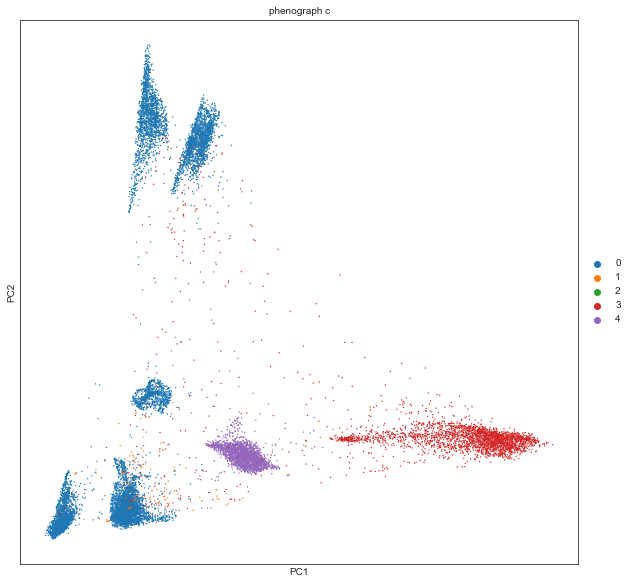

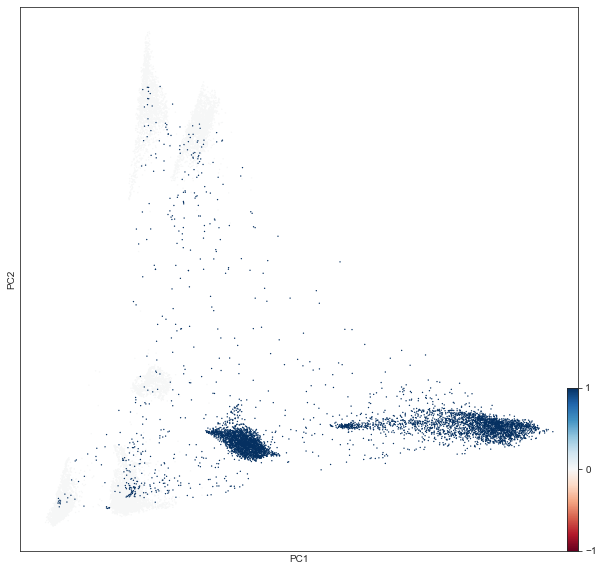

In [663]:
X_magic.obs['phenograph_c'] = c
X_magic.obsm['phenograph_P'] = P
scv.pl.pca(X_magic, c = 'phenograph_c', components='1,2', show=False, figsize= (10,10), frameon=True,  legend_loc = 'on right')

scv.pl.pca(X_magic, c = P.sum(axis = 1), components='1,2', show=False, figsize= (10,10), frameon=True, cmap = 'RdBu', norm=CenteredNorm(0) )


Using just the archetypes to train on doesn't work too well. I'm going to try to use the 100 closest cells to each archetype instead.

## Conclusions from PCHA on MAGIC imputed data  

It seems like 6 archetypes is the best, although one is CORL279 which we know has a lot of doublets. I'm going to try one more time without the doublets and see if the remaining CORL279 form their own archetype or not.

## T ratio calculation and comparison of single cell archetypes to bulk archetypes using enrichments
To do this, we will downscale the data using geosketch. This should keep an accurate representation of the shape of the data, but will make the ParTI matlab code more efficient. We will run archetype analysis using ParTI, and compare the single cell and bulk archetypes using the Hausser code (hypergeometric tests on enrichments). 

We will use the PCA of the MAGIC imputed data.

In [3]:
X_magic = sc.read_h5ad("../../out/cell-lines/X_magic_02.h5ad")

In [4]:
X_magic_scanorama = sc.read_h5ad("../../out/cell-lines/X_magic_scanorama_02.h5ad")

In [5]:
gs_pca = X_magic.obsm['X_pca']

In [6]:
from geosketch import gs
#Run geosketch on the PCA
N = 3000 # Number of samples to obtain from the data set.
sketch_index = gs(gs_pca, N, replace=False, seed=0)



In [7]:
# PCA components of downsampled data
X_sketch = gs_pca[sketch_index]

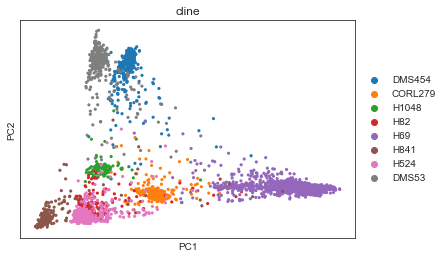

In [8]:
sc.pl.pca(X_magic[sketch_index,:], color = 'cline')

In [9]:
np.savetxt("../../out/cell-lines/downsampled_X_magic_for_ParTI.csv", X_magic[sketch_index,:].X, delimiter=",")


In [10]:
np.savetxt("../../out/cell-lines/X_magic_for_ParTI_GeneNames.csv", X_magic.var_names, fmt='%s')


In [33]:
obs_for_ParTI = X_magic[sketch_index,:].obs

In [34]:
obs_for_ParTI = obs_for_ParTI.drop(['dropkick_label', 'arcsinh_n_genes_by_counts','initial_size_spliced', 'initial_size_unspliced',
       'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito','total_counts_ambient',
       'log1p_total_counts_ambient','predicted_doublets', 'specialists_pca_diffdist',], axis = 1)

In [35]:
obs_for_ParTI

,dropkick_score,cline,pct_counts_mito,pct_counts_ambient,arcsinh_total_counts,S_score,G2M_score,phase,doublet_scores,cell_cycle_diff
CellID,,,,,,,,,,
2637-SM-1-GCCAAT_S1:AAAAGCCTATAGTCGCAx-DMS454,0.862373,DMS454,18.848167,16.039982,8.343316,-0.027755,0.021310,G2M,0.036167,-0.049066
2637-SM-1-GCCAAT_S1:AAAACTCGACCCTAACCx-DMS454,0.681735,DMS454,12.541473,10.948905,8.011024,0.237829,0.185338,S,0.040117,0.052491
2637-SM-1-GCCAAT_S1:AAAACCTCCACCACGCTx-DMS454,0.682875,DMS454,29.440937,25.541029,9.090655,0.083506,-0.199906,S,0.014958,0.283412
2637-SM-1-GCCAAT_S1:AAAACTCGATTGTTTACx-DMS454,0.799079,DMS454,17.331472,14.619067,9.213137,0.080234,-0.100396,S,0.038499,0.180630
2637-SM-1-GCCAAT_S1:AAAAGCCTATAAATAGGx-DMS454,0.905617,DMS454,24.700762,19.187523,8.615046,0.037753,-0.207089,S,0.027861,0.244843
...,...,...,...,...,...,...,...,...,...,...
2639-SM-2-CTTGTA_S2:TGGTATGACTACTTGTx-DMS53,0.838205,DMS53,19.320389,14.805825,8.323608,-0.198816,-0.266665,G1,0.028497,0.067849
2639-SM-2-CTTGTA_S2:TGCTATTTTTTGTGTCx-DMS53,0.819408,DMS53,15.752876,11.607382,8.919721,-0.056367,0.033257,G2M,0.022526,-0.089624
2639-SM-2-CTTGTA_S2:TTCGGCCTAAATCAGAx-DMS53,0.588067,DMS53,7.292540,5.951383,7.777374,-0.065285,-0.044367,G1,0.020360,-0.020918


In [16]:
obs_for_ParTI.to_csv("../../out/cell-lines/X_magic_for_ParTI_Attr.csv", index = False)

We will also run the same analysis on the MAGIC imputed and Scanorama batch corrected data. 

In [17]:
gs_pca = X_magic_scanorama.obsm['X_pca']

In [18]:
from geosketch import gs
#Run geosketch on the PCA
N = 3000 # Number of samples to obtain from the data set.
sketch_index = gs(gs_pca, N, replace=False, seed=0)



In [19]:
# PCA components of downsampled data
X_sketch = gs_pca[sketch_index]

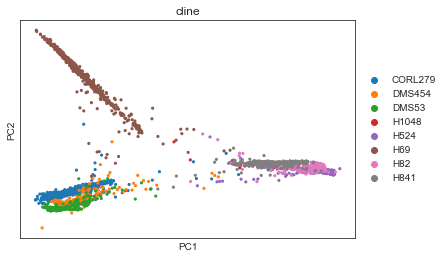

In [20]:
sc.pl.pca(X_magic_scanorama[sketch_index,:], color = 'cline')

In [21]:
np.savetxt("../../out/cell-lines/downsampled_X_magic_scanorama_for_ParTI.csv", X_magic_scanorama[sketch_index,:].X, delimiter=",")


In [22]:
np.savetxt("../../out/cell-lines/X_magic_scanorama_for_ParTI_GeneNames.csv", X_magic_scanorama.var_names, fmt='%s')


In [28]:
obs_for_ParTI = X_magic_scanorama[sketch_index,:].obs

In [29]:
obs_for_ParTI = obs_for_ParTI.drop(['dropkick_label', 'arcsinh_n_genes_by_counts','initial_size_spliced', 'initial_size_unspliced',
       'initial_size', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'total_counts_mito',
       'log1p_total_counts_mito','total_counts_ambient',
       'log1p_total_counts_ambient', 'specialists_pca_diffdist','arcsinh_total_counts'], axis = 1)

In [31]:
obs_for_ParTI.to_csv("../../out/cell-lines/X_magic_scanorama_for_ParTI_Attr.csv", index = False)

## Projection of MAGIC imputed scanorama-corrected data -- remove in final

Since the scanorama-corrected data kept some genes that got filtered from adata, we will rerun everything in this section.

In [217]:
bulk = pd.read_csv('../../../data/bulk-rna-seq/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv', header = 0, index_col = 0)
bulk.head()

,m.DMS153,m.NCIH60,m.NCIH69,m.NCIH82,m.NCIH128,m.NCIH146,m.NCIH187,m.NCIH209,m.NCIH211,m.NCIH250,...,c.NCIH524,c.NCIH526,c.NCIH69,c.NCIH82,c.NCIH841,c.NCIH889,c.SBC5,c.SCLC21H,c.SHP77,c.SW1271
A1BG,2.955199,3.239727,3.599770,3.055231,4.579507,4.685081,3.215947,4.181752,1.288835,4.804468,...,4.183146,3.405942,4.256034,3.905371,4.436237,5.073359,4.423783,3.713345,3.438644,4.209637
A1CF,0.077212,0.167166,0.117398,0.536179,0.088160,0.074992,0.080727,0.079204,0.107217,0.090348,...,-0.057567,0.623162,-0.107734,-0.016782,0.183740,0.242981,0.008349,0.003494,-0.073834,-0.001700
A2M,2.267502,0.122302,0.085891,1.586479,0.064500,0.231189,0.059062,0.072303,0.189474,0.066101,...,-0.038265,-0.006552,0.040540,0.221331,1.276428,0.039852,0.681201,0.032354,1.635919,0.303402
A2ML1,0.011011,-0.007241,-0.005086,-0.004471,-0.003819,0.011107,-0.003497,-0.003431,-0.004644,-0.003914,...,0.003116,0.006167,0.006514,0.017533,0.015672,0.114451,0.043520,0.004658,0.003820,0.031692
A4GALT,2.453512,1.528297,1.428711,0.359365,0.865621,0.867495,2.455182,1.037618,0.265048,3.132071,...,0.569911,1.458448,0.513539,0.191663,3.127982,0.086832,2.641161,0.764500,0.861152,1.868799


In [218]:
bulk = bulk.loc[[i not in ['MARC1', 'MARC2', 'MARCH1', 'MARCH11', 'MARCH2', 'MARCH3', 'MARCH4', 'MARCH5', 'MARCH6', 'MARCH7', 'MARCH8', 'MARCH9', 'SEPT10', 'SEPT11', 'SEPT12', 'SEPT14', 'SEPT2', 'SEPT3', 'SEPT4', 'SEPT5', 'SEPT6', 'SEPT7', 'SEPT8', 'SEPT9'] for i in bulk.index]]

In [219]:
from sklearn import preprocessing as pp
from sklearn.decomposition import PCA

shared_genes = sorted(list(set(X_magic_scanorama.var_names).intersection(bulk.index)))
bulk = bulk.loc[shared_genes]
bulk = pd.DataFrame(pp.scale(bulk), columns = bulk.columns, index = bulk.index)
# bulk = bulk / np.linalg.norm(bulk, axis=0)

pca = PCA(n_components=20)
data_pca = pca.fit_transform(bulk.T)
pca_df = pd.DataFrame(data_pca)



We also read in the archetype locations and transform with the same PCA.

In [223]:
arc = pd.read_csv('../../../data/bulk-rna-seq/arc_gene_space_no_lowgenes-10-21-20.csv', header = None, index_col = None)
arc_genes = pd.read_csv('../../../data/bulk-rna-seq/geneNames_wo_lowgenes.csv', header = None, index_col = None)
arc.columns = arc_genes[0]
arc = arc.T
arc.columns = ['SCLC-Y','SCLC-P','SCLC-N', 'SCLC-A2', 'SCLC-A']
arc.head()

,SCLC-Y,SCLC-P,SCLC-N,SCLC-A2,SCLC-A
0,,,,,
A1BG,3.639489,1.927857,4.448826,3.321331,4.151298
A1CF,0.218535,0.690655,0.011054,0.600117,-0.178952
A2M,0.915044,0.403488,0.262599,0.418040,0.058488
A2ML1,0.145542,0.073408,0.025584,0.033519,0.096227
A4GALT,3.311321,0.334271,1.159494,1.775815,0.996153


In [224]:
arc = arc.loc[shared_genes]
arc = pd.DataFrame(pp.scale(arc), columns = arc.columns, index = arc.index)

# arc = arc / np.linalg.norm(arc, axis=0)

arc_pca = pca.transform(arc.T)
arc_pca_df = pd.DataFrame(arc_pca, index=arc.columns)
arc_pca_df['color'] = arc.columns



In [225]:
tmp = X_magic_scanorama[:,shared_genes]
magic_df = pd.DataFrame(tmp.X, index=tmp.obs_names, columns=tmp.var_names)
magic_df = magic_df.T
# magic_df = magic_df / np.linalg.norm(magic_df, axis=0)
magic_df = pd.DataFrame(pp.scale(magic_df), columns = magic_df.columns, index = magic_df.index)


magic_pca = pca.transform(magic_df.T)

/Users/smgroves/Documents/anaconda3/envs/mazebox_env/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [226]:
magic_pca_df = pd.DataFrame(magic_pca, index=magic_df.columns)


In [227]:
# cline_dict = {sorted(X_magic.obs.cline.unique())[i]:X_magic.uns['cline_colors'][i] for i in range(0,8)}

<AxesSubplot:xlabel='0', ylabel='1'>

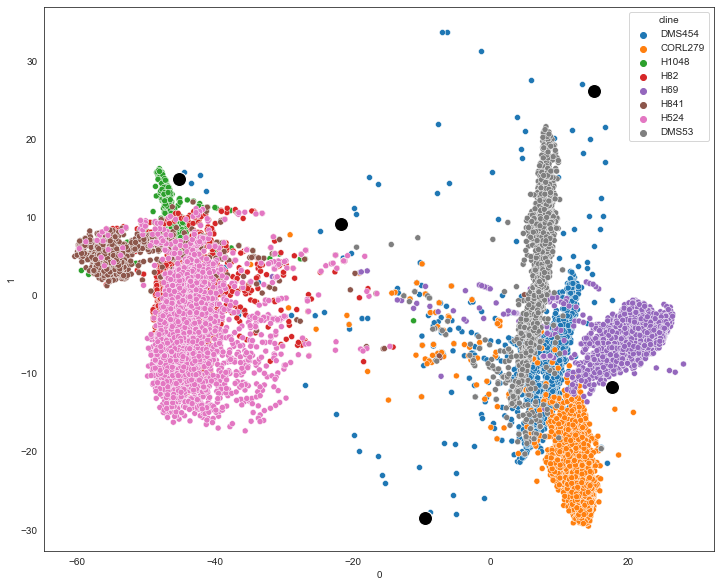

In [228]:

plt.figure(figsize = (12,10))
sns.scatterplot(-pca_df[0], pca_df[1])
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-magic_pca_df[0], magic_pca_df[1], hue =  X_magic.obs['cline'])


### Compare the variance explained to the variance explained by shuffled PCs.

Total variance in imputed and scaled single cell dataset:

In [229]:
tot_var = magic_df.T.var().sum()
tot_var

10254.524

In [ ]:
ev = []
for i in range(10):
    ran = shuffle(bulk)
    ran.index = bulk.index
    ran_pca = PCA(n_components=20)
    ran_data_pca = ran_pca.fit_transform(ran.T)
    ran_pca_df = pd.DataFrame(ran_data_pca)
    magic_pca_rand = ran_pca.transform(magic_df.T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


Text(0.5, 1.0, 'Explained Variance for Imputed, Batch-Corrected Single Cell Data in PCA on Bulk Data')

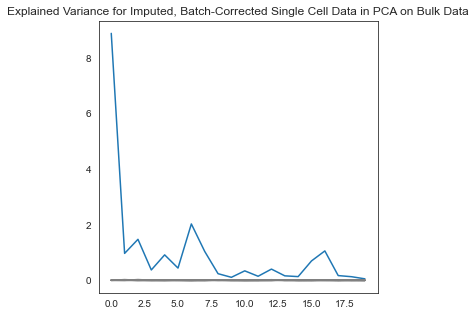

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed, Batch-Corrected Single Cell Data in PCA on Bulk Data')

### Compare the variance explained to the variance explained in shuffled data.

In [241]:
# Shuffling preserves total variance in data
shuffle(magic_df).T.var().sum()

10254.524

In [236]:
ev = []
for i in range(10):
    pca = PCA(n_components=50)
    data_pca = pca.fit_transform(bulk.T)
    pca_df = pd.DataFrame(data_pca)
    magic_pca_50 = pca.transform(magic_df.T)
    magic_pca_df_50 = pd.DataFrame(magic_pca_50, index=magic_df.columns)

    # fit shuffled data
    magic_pca_rand = pca.transform(shuffle(magic_df).T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


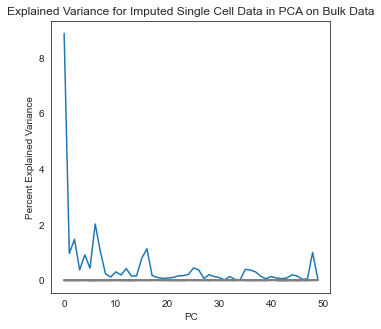

In [242]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [243]:
#ev_df for seaborn 
flat_list = [item for sublist in ev for item in sublist]
ev_df = pd.DataFrame(10*list(range(50)), columns=['PC'])
ev_df['ev'] = [100*i for i in flat_list]

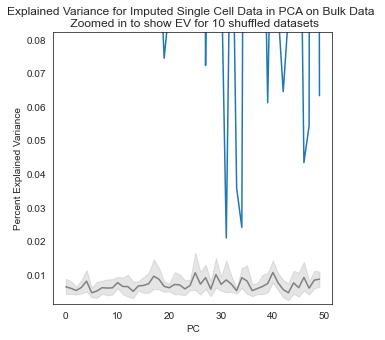

In [244]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
# for i in range(10):
#     plt.plot([100*x for x in ev[i]], c = 'grey')
sns.lineplot(data = ev_df, x = 'PC', y = 'ev', color = 'grey')
plt.ylim(100*min(min(ev)),500*max(max(ev)))
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data \n Zoomed in to show EV for 10 shuffled datasets')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [449]:
# XC_df_loadings = pd.DataFrame(X_magic.varm['PCs'], index = X_magic.var_names)

# XC_df = pd.DataFrame(XC_5_50comp)
# XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


# X_Magic_arc_genespace = XC_df_loadings.dot(XC_df)


# arc.join(X_Magic_arc_genespace)

## Labeling MAGIC data based on bulk archetypes -- remove in final

In [ ]:
full_df = magic_pca_df.append(arc_pca_df.drop('color',axis = 1))
# full_df

In [107]:
pdx = squareform(pdist(full_df, metric='euclidean')) # compute distances on pca
pdx_df = pd.DataFrame(pdx, index=full_df.index, columns=full_df.index)
pdx_df = pdx_df.loc[arc_pca_df.drop('color',axis = 1).index].drop(arc_pca_df.drop('color',axis = 1).index, axis = 1)


Now that we have a euclidean distance to each archetype on the MAGIC imputed data, we can find a neighborhood with arbritrary radius to classify cells closest to each archetype as specialists. In Van Dijk et al., they choose a radius (distance on diffusion map) that is 1/2 the minimum of the distance between archetypes.

In [138]:
list_idx = []
list_type = []
list_train = []
for i in pdx_df.index:
    tmp_sort = pdx_df.T.sort_values(i).iloc[0:int(.01*len(pdx_df.columns))]
    tmp_list = tmp_sort.index
    for f in tmp_list:
        list_idx.append(f)
        list_type.append(i)
    tmp_arr = np.array(magic_pca_df.loc[tmp_list])
    list_train.append(tmp_arr)

In [135]:
import phenograph
test = magic_pca_df.drop(list_idx)
# crazy reshaping necessary because phenograph classify requires a list of arrays, one array per subtype
# c, P = phenograph.classify(train=[np.reshape(examples, (1, -1)) for examples in np.array(arc_pca_df.drop('color',axis = 1))], test = magic_pca_df)
c, P = phenograph.classify(train=list_train, test = test)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm


<AxesSubplot:xlabel='0', ylabel='1'>

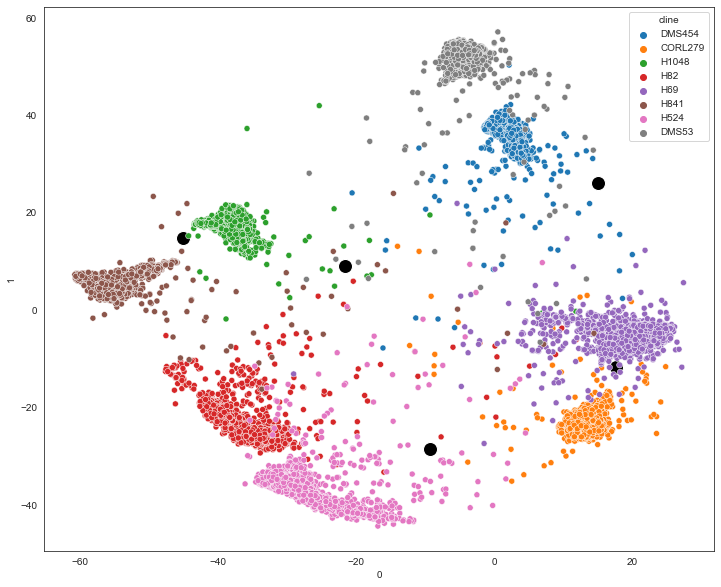

In [155]:

plt.figure(figsize = (12,10))
# sns.scatterplot(-pca_df[0], pca_df[1])
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-magic_pca_df[0], magic_pca_df[1], hue =  X_magic.obs['cline'])


<AxesSubplot:xlabel='0', ylabel='1'>

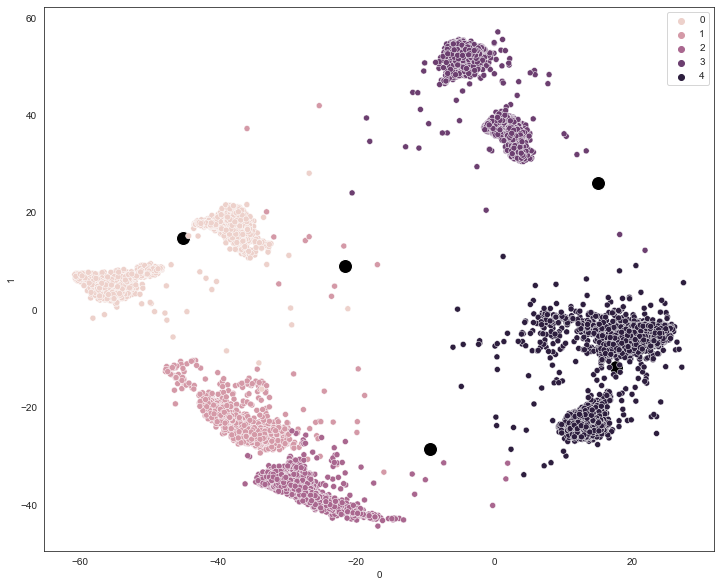

In [ ]:

plt.figure(figsize = (12,10))
# sns.scatterplot(-pca_df[0], pca_df[1])
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-test[0], test[1], hue = c)


<AxesSubplot:xlabel='0', ylabel='1'>

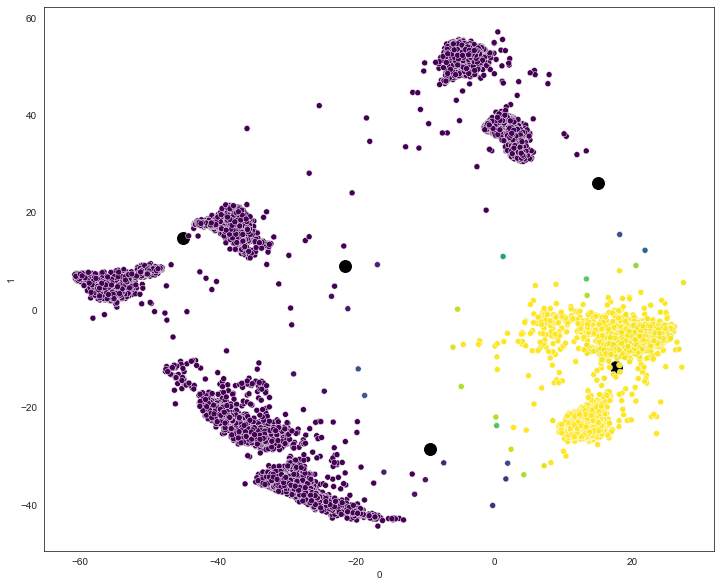

In [ ]:

plt.figure(figsize = (12,10))
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-test[0], test[1], c = P[:,4], cmap = 'viridis')


<AxesSubplot:xlabel='0', ylabel='1'>

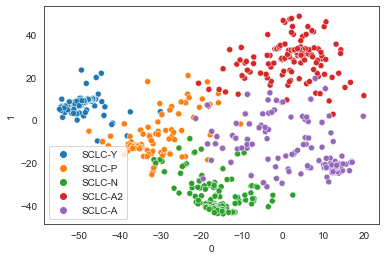

In [ ]:
train = magic_pca_df.loc[list_idx]
sns.scatterplot(-train[0], train[1], hue = list_type)


In [ ]:
np.unique(c, return_counts=True)

(array([0, 2]), array([6821, 9287]))

 ## Projection of MAGIC imputed data, "batch corrected" by corresponding bulk sample -- NOT DONE

Using the rescaled bulk sample corresponding to each cell line, subtract it from the single cell sample to "recenter" the single cell sample's average on the bulk sample's gene expression profile. Do this after rescaling the single cell data as well.

In [174]:
tmp = X_magic[:,shared_genes]
magic_df = pd.DataFrame(tmp.X, index=tmp.obs_names, columns=tmp.var_names)
magic_df = magic_df.T
# magic_df = magic_df / np.linalg.norm(magic_df, axis=0)
# magic_df = pd.DataFrame(pp.scale(magic_df), columns = magic_df.columns, index = magic_df.index)



In [128]:
bulk_tmp = bulk.T.copy()

bulk_tmp['cline'] = bulk_tmp.index
bulk_tmp['cline'] = bulk_tmp.cline.str.split('.', expand=True)[1]
bulk_mean = bulk_tmp.groupby('cline').mean()
bulk_mean = bulk_mean.loc[['NCIH69','NCIH82','NCIH524','NCIH1048','NCIH841','DMS53','DMS454','CORL279']]
bulk_mean

In [142]:
bulk_mean.index = [i[3:] if 'NCI' in i else i for i in bulk_mean.index ]

In [175]:
magic_df_tmp = magic_df.T.copy()
magic_df_tmp['cline'] = magic_df_tmp.index
magic_df_tmp.cline = magic_df_tmp.cline.str.split('-', expand=True)[4]

In [191]:
num_cells = pd.Series(magic_df_tmp.cline.value_counts())
ave_sc = magic_df_tmp.groupby('cline').sum()
ave_sc['num_cells'] = num_cells
ave_sc = ave_sc.iloc[:,:-1].div(ave_sc.num_cells, axis=0)

In [194]:
translation = ave_sc - bulk_mean

In [ ]:
magic_pca_bc = pca.transform(magic_df.T)

In [178]:
magic_pca_df = pd.DataFrame(magic_pca, index=magic_df.columns)


In [179]:
# cline_dict = {sorted(X_magic.obs.cline.unique())[i]:X_magic.uns['cline_colors'][i] for i in range(0,8)}

<AxesSubplot:xlabel='0', ylabel='1'>

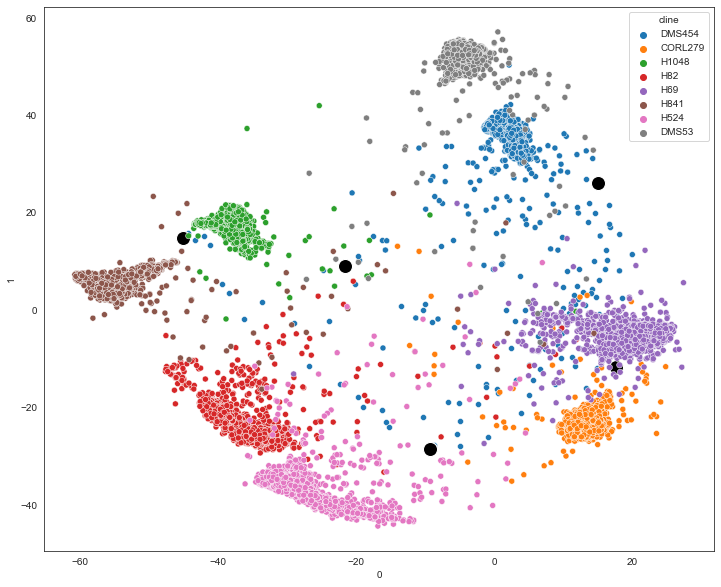

In [180]:

plt.figure(figsize = (12,10))
sns.scatterplot(-pca_df[0], pca_df[1])
sns.scatterplot(-arc_pca_df[0], arc_pca_df[1], color = 'k', s = 200)
sns.scatterplot(-magic_pca_df[0], magic_pca_df[1], hue =  X_magic.obs['cline'])


### Compare the variance explained to the variance explained by shuffled PCs.

Total variance in imputed and scaled single cell dataset:

In [371]:
tot_var = magic_df.T.var().sum()
tot_var

12187.799

In [ ]:
ev = []
for i in range(10):
    ran = shuffle(bulk)
    ran.index = bulk.index
    ran_pca = PCA(n_components=50)
    ran_data_pca = ran_pca.fit_transform(ran.T)
    ran_pca_df = pd.DataFrame(ran_data_pca)
    magic_pca_rand = ran_pca.transform(magic_df.T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


Text(0.5, 1.0, 'Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')

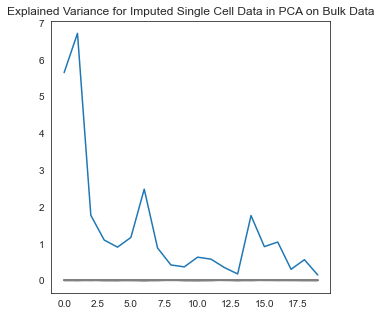

In [258]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')

### Compare the variance explained to the variance explained in shuffled data.

In [402]:
# Shuffling preserves total variance in data
shuffle(magic_df).T.var().sum()

12187.799

In [379]:
ev = []
for i in range(10):
    pca = PCA(n_components=50)
    data_pca = pca.fit_transform(bulk.T)
    pca_df = pd.DataFrame(data_pca)
    magic_pca_50 = pca.transform(magic_df.T)
    magic_pca_df_50 = pd.DataFrame(magic_pca_50, index=magic_df.columns)

    # fit shuffled data
    magic_pca_rand = pca.transform(shuffle(magic_df).T)
    magic_pca_df_rand = pd.DataFrame(magic_pca_rand, index=magic_df.columns)
    ev.append(list(magic_pca_df_rand.var()/tot_var))


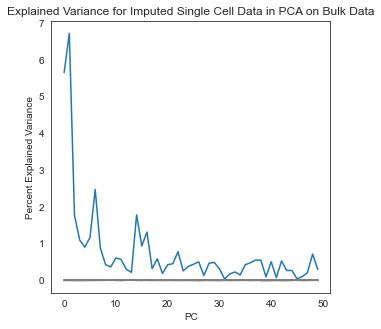

In [399]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
for i in range(10):
    plt.plot([100*x for x in ev[i]], c = 'grey')
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [430]:
#ev_df for seaborn 
flat_list = [item for sublist in ev for item in sublist]
ev_df = pd.DataFrame(10*list(range(50)), columns=['PC'])
ev_df['ev'] = [100*i for i in flat_list]

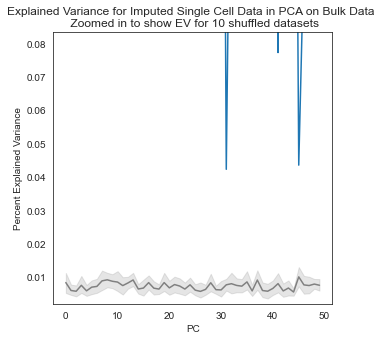

In [541]:
plt.figure(figsize = (5,5))
plt.plot(100*magic_pca_df_50.var()/tot_var)
# for i in range(10):
#     plt.plot([100*x for x in ev[i]], c = 'grey')
sns.lineplot(data = ev_df, x = 'PC', y = 'ev', color = 'grey')
plt.ylim(100*min(min(ev)),500*max(max(ev)))
plt.title('Explained Variance for Imputed Single Cell Data in PCA on Bulk Data \n Zoomed in to show EV for 10 shuffled datasets')
plt.ylabel("Percent Explained Variance")
plt.xlabel("PC")
plt.show()

In [449]:
# XC_df_loadings = pd.DataFrame(X_magic.varm['PCs'], index = X_magic.var_names)

# XC_df = pd.DataFrame(XC_5_50comp)
# XC_df.columns = ['Arc_1','Arc_2','Arc_3','Arc_4','Arc_5']


# X_Magic_arc_genespace = XC_df_loadings.dot(XC_df)


# arc.join(X_Magic_arc_genespace)

# From 3: Human Cell Lines

## Plotly ternary plots

In [2]:
adata = sc.read_h5ad('../int/clines/adata03.h5ad')


In [ ]:
adata.obs['SCLC-NE_Score_pos'] = adata.obs['SCLC-NE_Score_pos']+adata.obs['SCLC-A2_Score_pos']+adata.obs['SCLC-N_Score_pos']


In [ ]:

color_map_pheno = {}
import plotly.express as px
for b, c in zip(sorted(list(set(adata.obs.arc_pheno))),px.colors.qualitative.Bold):
    color_map_pheno[b] = c
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-NE_Score_pos", b="SCLC-P_Score_pos", c="SCLC-Y_Score_pos", color = 'batch', 
                         color_discrete_map=color_map_pheno)
# fig.update_traces(legendgroup={'Specialists':['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y'],
#                               "Generalists":['SCLC-A_SCLC-A2','SCLC-A2_SCLC-N','SCLC-A_SCLC-N','SCLC-A_SCLC-Y','SCLC-N_SCLC-Y','SCLC-P_SCLC-Y' ]}
#                   , selector=dict(type='scatter'))
# fig.update_layout(legend_traceorder='grouped')
fig.show()
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-A_Score_pos", b="SCLC-A2_Score_pos", c="SCLC-N_Score_pos", color = 'batch',
                         color_discrete_map=color_map_pheno)
fig.show()

In [ ]:
fig = px.scatter_ternary(adata.obs.sort_values('arc_pheno'), a="SCLC-NE_Score_pos", b="SCLC-P_Score_pos", c="SCLC-Y_Score_pos", color = 'arc_pheno', 
                         color_discrete_map=color_map_pheno)
# fig.update_traces(legendgroup={'Specialists':['SCLC-A','SCLC-A2','SCLC-N','SCLC-P','SCLC-Y'],
#                               "Generalists":['SCLC-A_SCLC-A2','SCLC-A2_SCLC-N','SCLC-A_SCLC-N','SCLC-A_SCLC-Y','SCLC-N_SCLC-Y','SCLC-P_SCLC-Y' ]}
#                   , selector=dict(type='scatter'))
# fig.update_layout(legend_traceorder='grouped')
fig.show()
fig = px.scatter_ternary(adata[adata.obs['SCLC-NE_Score_pos']>.8].obs.sort_values('arc_pheno'), a="SCLC-A_Score_pos", b="SCLC-A2_Score_pos", c="SCLC-N_Score_pos", color = 'arc_pheno',
                         color_discrete_map=color_map_pheno)
fig.show()

In [ ]:
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(12,4))
p = sns.barplot(y = np.unique(adata.obs['arc_pheno'], return_counts=True)[0], x = (np.unique(adata.obs['arc_pheno'], return_counts=True)[1]),
               )
# p.set(xscale="log")
plt.xlim(.9, max(np.unique(adata.obs['arc_pheno'], return_counts=True)[1])+1000)
plt.xlabel('Number of Cells with Each Phenotype')
plt.show()

In [ ]:
def plot_gene(adata, genes):
    tmp = adata.obs.copy()
    for gene in genes:
        tmp[gene] = adata.obs_vector(gene)
        plt.figure(figsize = (10,8))
        sns.barplot(y = tmp['arc_pheno'], x =tmp[gene], order=tmp.groupby('arc_pheno').mean().sort_values(gene, ascending=False).index)
        plt.title(gene)
        plt.xlabel('Expression (Log1p(Normalized Counts))')
        plt.ylabel('Phenotype')
        plt.show()

In [ ]:
plot_gene(adata, ['ASCL1','POU2F3','MYC','YAP1','SOX1'])

In [ ]:
scv.pl.scatter(adata, basis = 'umap_sc', color = [f"{x}_Score_pos" for x in ['SCLC-N', 'SCLC-A', 'SCLC-P', 'SCLC-Y', 'SCLC-A2']], figsize = (10,10), cmap = 'viridis')


In [ ]:
scv.pl.scatter(adata, basis = 'umap_sc', color = 'arc_pheno', figsize = (5,5), legend_loc = 'on right', palette = 'tab20')
scv.pl.scatter(adata, basis = 'umap_sc', color = 'arc_aa_type', figsize = (5,5), legend_loc = 'on right' )